In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

In [5]:
df = pd.read_csv('listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6606,"Fab, private seattle urban cottage!",14942,Joyce,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99.0,30,161,2024-09-07,0.84,2,177,1,str-opli-19-002622
1,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,66.0,2,210,2025-02-02,1.18,10,317,16,Exempt
2,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65608,-122.33602,Entire home/apt,NaN,30,96,2020-09-28,0.57,2,0,0,STR -OPLI-19-002622
3,25002,Beautiful Private Spot in North Ballard,102684,Amanda,Ballard,Whittier Heights,47.67947,-122.37196,Entire home/apt,86.0,2,1101,2025-02-28,6.07,1,104,59,STR-OPLI-19-002617
4,119103,Teeny Tiny Guestyhouse!,601600,Hal,Other neighborhoods,Fremont,47.65244,-122.35108,Entire home/apt,83.0,3,574,2025-02-17,3.43,2,345,29,STR-OPLI-19-000772


In [6]:
selected_columns = [
    'room_type', 'neighbourhood_group', 'minimum_nights',
    'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'price'
]

dataset = df[selected_columns].copy()

dataset.isnull().sum()
dataset = dataset.dropna(subset=['price'])
dataset.head()



,room_type,neighbourhood_group,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Entire home/apt,Other neighborhoods,30,161,0.84,2,177,99.0
1,Private room,Other neighborhoods,2,210,1.18,10,317,66.0
3,Entire home/apt,Ballard,2,1101,6.07,1,104,86.0
4,Entire home/apt,Other neighborhoods,3,574,3.43,2,345,83.0
6,Private room,Magnolia,1,387,2.38,1,138,49.0


SimpleImputer

In [7]:
imputer = SimpleImputer(strategy='mean')  
dataset['reviews_per_month'] = imputer.fit_transform(dataset[['reviews_per_month']])


In [10]:
x = dataset.iloc[0:,:-1].values      
y = dataset.iloc[:,-1].values 
x

array([['Entire home/apt', 'Other neighborhoods', 30, ..., 0.84, 2, 177],
       ['Private room', 'Other neighborhoods', 2, ..., 1.18, 10, 317],
       ['Entire home/apt', 'Ballard', 2, ..., 6.07, 1, 104],
       ...,
       ['Entire home/apt', 'Queen Anne', 2, ..., 2.192831278890601, 29,
        287],
       ['Entire home/apt', 'Queen Anne', 2, ..., 2.192831278890601, 29,
        290],
       ['Entire home/apt', 'Other neighborhoods', 1, ...,
        2.192831278890601, 5, 46]], shape=(6008, 7), dtype=object)

In [11]:
categorical_features = ['room_type', 'neighbourhood_group']
numerical_features = ['minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count',
                      'availability_365']

ct = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), [0, 1]),  #column positions
    ('num', StandardScaler(), [2, 3, 4, 5, 6])
])



Traing and Testing Splitting

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [13]:
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [14]:
x = dataset[['number_of_reviews']].values
y = dataset[['price']].values

Linear Regression

In [15]:
#Fit the Model
regressor = LinearRegression()
regressor.fit(x, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
#prediction line
y_pred_line = regressor.predict(x)
y_pred_line

array([[144.62427189],
       [138.11789793],
       [ 19.8081183 ],
       ...,
       [166.00235777],
       [166.00235777],
       [166.00235777]], shape=(6008, 1))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Scatter Plot

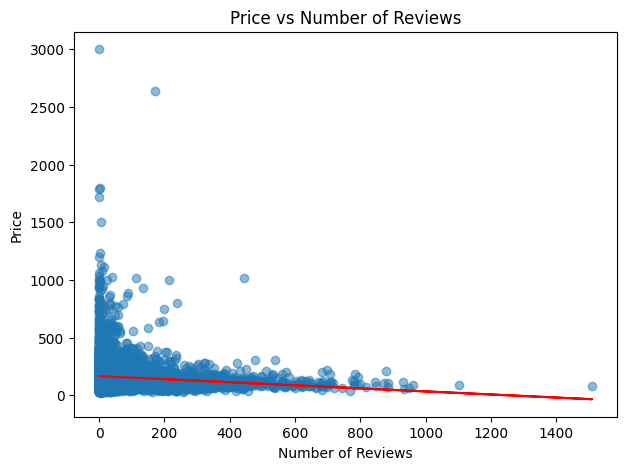

In [18]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred_line, color='red') 
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()


In [19]:
regressorM = LinearRegression()
regressorM.fit(x_train, y_train)

y_predict = regressorM.predict(x_test)

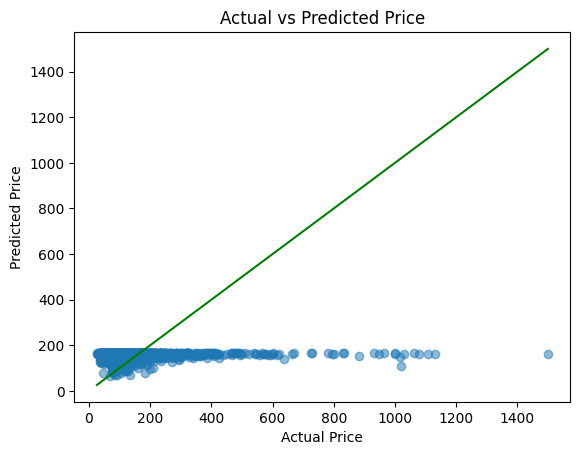

In [20]:
plt.scatter(y_test, y_predict, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color ='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

BACKWARD ELIMINATION METHOD

In [21]:
df = pd.read_csv('listings.csv')
df = df[['room_type', 'neighbourhood_group', 'minimum_nights', 'number_of_reviews',
         'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price']]
df = df.dropna()

df['room_type'] = LabelEncoder().fit_transform(df['room_type'])
df['neighbourhood_group'] = LabelEncoder().fit_transform(df['neighbourhood_group'])
 
X = df.drop('price', axis=1).values
Y = df['price'].values

X = sm.add_constant(X)


X_opt = X[:, [0,1,2,3,4,5,6,7]].astype(float)
reg_ols = sm.OLS(Y, X_opt).fit()
reg_ols.summary()

X_opt = X[:, [0,2,3,4,5,6,7]].astype(float)
reg_ols = sm.OLS(Y, X_opt).fit()
reg_ols.summary()

X_opt = X[:, [0,2,4,5,6,7]].astype(float)
reg_ols = sm.OLS(Y, X_opt).fit()
reg_ols.summary()

X_opt = X[:, [0,2,4,5,7]].astype(float)
reg_ols = sm.OLS(Y, X_opt).fit()
reg_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     28.20
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           3.27e-23
Time:                        17:00:29   Log-Likelihood:                -32050.
No. Observations:                5192   AIC:                         6.411e+04
Df Residuals:                    5187   BIC:                         6.414e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.6775      4.771     31.792      0.000     142.324     161.030
x1            -0.4144      0.330     -1.256      0.209      -1.061       0.232
x2            -0.0677      0.015     -4.449      0.000      -0.098      -0.038
x3            -3.2644      0.897     -3.638      0.000      -5.023      -1.505
x4             0.0724      0.015      4.898      0.000       0.043       0.101
==============================================================================
Omnibus:                     5844.697   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           997562.217
Skew:                           5.553   Prob(JB):                         0.00
Kurtosis:                      69.992   Cond. No.                         713.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Model Evaluation Metrics for Regression

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
 
mean_absolute_error_val = mean_absolute_error(y_test, y_pred)
mean_squared_er = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_er)
r2_scores = r2_score(y_test, y_pred)


N = len(y_test)          
k = x_test.shape[1]      
r2_score_adj = (1 - r2_scores) * (N - 1) / (N - k - 1)

print("Mean_absolute_error : {:.2f}".format(mean_absolute_error_val))
print("Mean_squared_error  : {:.2f}".format(mean_squared_er))
print("RMSE                : {:.2f}".format(rmse))
print("R² Score            : {:.2f}".format(r2_scores))
print("Adjusted R² Score   : {:.2f}".format(r2_score_adj))

Mean_absolute_error : 74.13
Mean_squared_error  : 15987.18
RMSE                : 126.44
R² Score            : 0.02
Adjusted R² Score   : 0.98
